In [ ]:
SEQ_LENGTH = 3
LEARNING_RATE = 8e-4

PATH = "./dataset"
data_filename = "filtered_data.csv"


import pandas as pd

df = pd.read_csv(f"{PATH}/{data_filename}")
df.fillna(0, inplace=True)

df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
df = df.set_index('Data e Hora')
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [146]:
import numpy as np

# df = df.apply(np.log1p)
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [147]:
# df = df.apply(lambda col: col.diff(), axis=0).iloc[2:]
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [148]:
serie = ['producao_renovavel']
df = df[serie]

train_ratio = 0.8
val_ratio = 0.2
test_ratio = 0.2

train_split = int(df.shape[0] * train_ratio * (1 - val_ratio))
val_split = int(df.shape[0] * train_ratio * val_ratio)
test_split = int(df.shape[0] * test_ratio)

df_train = df[:train_split]
df_val = df[train_split:train_split + val_split]
df_test = df[:test_split]

In [149]:
def create_sequences(data, timesteps):
    X, y = [], []
    num_samples = len(data) // timesteps  # Ensure only full sequences are used

    for i in range(num_samples):
        start = len(data) - (i + 1) * timesteps
        end = start + timesteps

        if start >= 0:  # Ensure valid indexing
            X.append(data[start:end])
            y.append(data[start - 1])

    return np.array(X), np.array(y)

In [ ]:
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

# Define the checkpoint callback
checkpoint = ModelCheckpoint(f"{PATH}/best_model.weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Normalize the data
scaler = MinMaxScaler(feature_range=(int(np.min(df_train)), int(np.max(df_train))))
# scaler = PowerTransformer()

df_train_scaled = scaler.fit_transform(df_train)
df_val_scaled = scaler.transform(df_val)
df_test_scaled = scaler.transform(df_test)


X_train, y_train = create_sequences(df_train_scaled, SEQ_LENGTH)
X_val, y_val = create_sequences(df_val_scaled, SEQ_LENGTH)
X_test, y_test = create_sequences(df_test_scaled, 1) # to forecast a single day


print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


# Define the LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=df_train_scaled.shape),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), loss='log_cosh', metrics=['mse', 'mae'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Training set size: (1105, 3, 1)
Validation set size: (276, 3, 1)
Test set size: (1036, 1, 1)
Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 69.0392 - mae: 69.7324 - mse: 5869.8203 - val_loss: 75.3172 - val_mae: 76.0104 - val_mse: 6657.7905
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65.1279 - mae: 65.8211 - mse: 5334.4722 - val_loss: 69.5886 - val_mae: 70.2817 - val_mse: 5822.0620
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 59.4444 - mae: 60.1375 - mse: 4621.2300 - val_loss: 64.0146 - val_mae: 64.7078 - val_mse: 5064.4277
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.9921 - mae: 53.6853 - mse: 3846.3127 - val_loss: 58.3152 - val_mae: 59.0084 - val_mse: 4358.1279
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48.9635 - mae: 49.6558 - mse: 3480.6738 - val_loss: 51.9736 - val_mae: 52.6668 - val_mse: 3649.6816
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.3451 - mae: 42.0343 - mse: 2776.9089 - val_l

In [155]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(1036, 1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


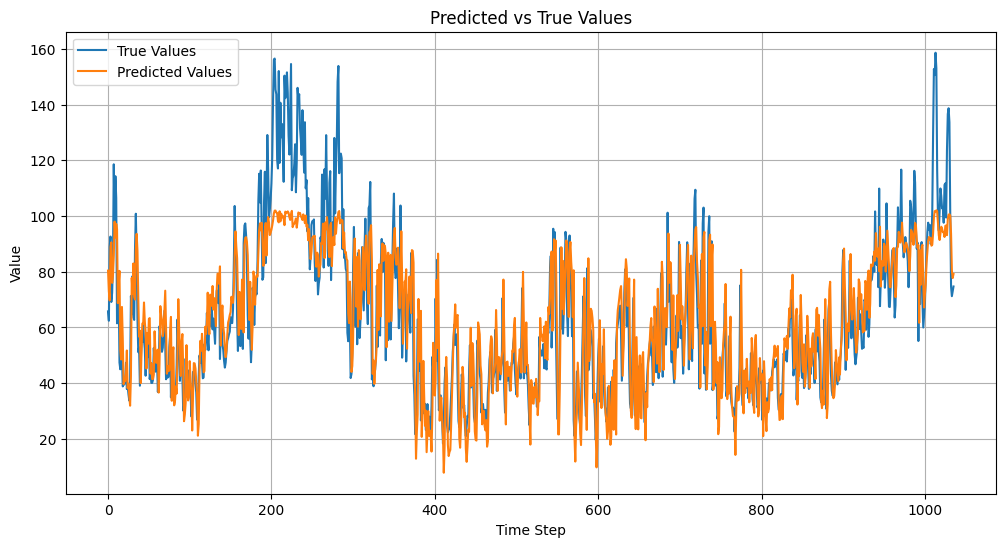

Mean Absolute Error (MAPE) (%): 19.18%
R-squared (R2): 0.6789002817619302


In [156]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_reshaped = y_pred.flatten().reshape(-1, 1)
y_test_reshaped = y_test.flatten().reshape(-1, 1)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = scaler.inverse_transform(y_pred_reshaped)
y_test_original = scaler.inverse_transform(y_test_reshaped)

# Create a DataFrame for easier plotting and comparison
comparison_df = pd.DataFrame({ 'Predicted': y_pred_original.flatten(), 'True': y_test_original.flatten() })

# Plotting the predicted vs true values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['True'], label='True Values')
plt.plot(comparison_df['Predicted'], label='Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate additional metrics (optional)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

mae_percent = mae / np.mean(y_test_original) * 100

print(f"Mean Absolute Error (MAPE) (%): {mae_percent:.2f}%")
print(f"R-squared (R2): {r2}")
